# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to visualize the report of an already created simulation.

**The simulation is ran on MULTI CPU - MULTI server topology**

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple

In [20]:
url = "http://78.47.131.57:8080"

In [21]:
create_url = url + "/simulation"

In [22]:
report_url = url + '/report'

# Read Report

In [23]:
querystring = {"runtime_id": "fbc68b02391211eab46facde48001122"}

In [24]:
response = requests.request("GET", report_url, params=querystring)
response # should be 200

<Response [200]>

In [25]:
# response.text

In [26]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

In [27]:
# report.report

# Visualize Report

In [28]:
def visualize_metrics(data, title="Usage"):
    data_frame = pd.DataFrame(data,
                              columns=["step", "usage", "queue"])
    data_frame = data_frame.groupby(["step"]).max()
    # data_frame.to_csv('rep.csv')

    plt.subplot(2, 1, 1)
    plt.plot(data_frame["usage"])
    plt.title(title)
    plt.margins()
    plt.subplot(2, 1, 2)
    plt.plot(data_frame["queue"])
    plt.title("Requests in queue")
    plt.subplots_adjust(hspace=0.5)
    plt.show()

## Server 1

In [29]:
df_list = []
for server in report.report:
    for component in server.metrics:
        df = pd.DataFrame(component, columns=["step", "cpu_usage", "queue"])
        df_list.append(df)

In [30]:
# df_list

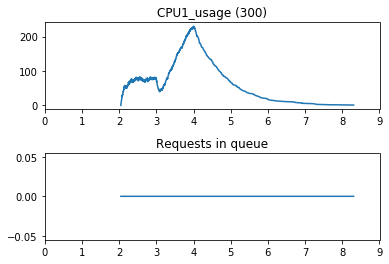

In [36]:
data_frame = df_list[0]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (300)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

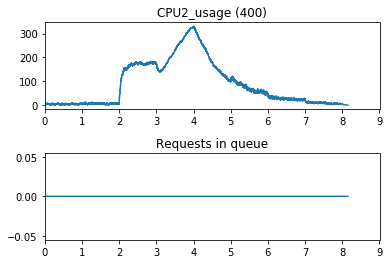

In [32]:
data_frame = df_list[1]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (400)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

# Server 2

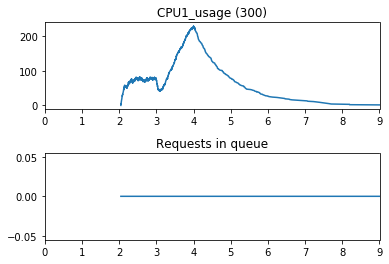

In [33]:
data_frame = df_list[2]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (300)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

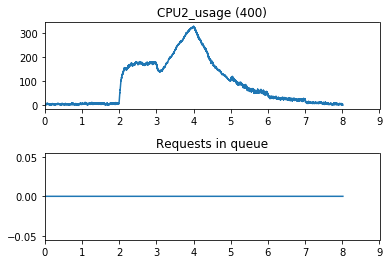

In [34]:
data_frame = df_list[3]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (400)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

# DB Server 

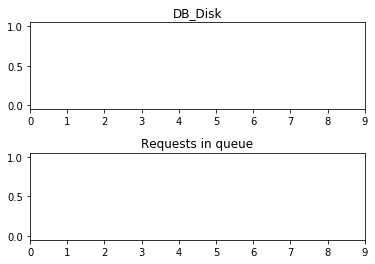

In [35]:
data_frame = df_list[4]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("DB_Disk")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)